In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data
import matplotlib

In [2]:
X = np.transpose(np.genfromtxt("data/xi.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("data/tau.csv", delimiter=","))
N = 50

In [3]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [4]:
learning_rate_range = [0.001, 0.02, 0.05, 0.2]

errors = []
for learning_rate in learning_rate_range:
    array = []
    for _ in range(10):
        network = Network(N, learning_rate=learning_rate)

        train, test = Data.sample(X, Y)
        error = network.train(train, test, t_max=100)
        array.append(error)
    array = np.mean(array, axis=0)
    errors.append(array)

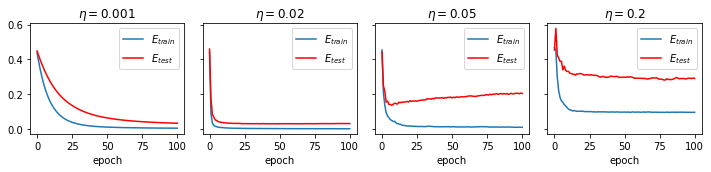

In [5]:
plt.close()
fig, plots = plt.subplots(1, len(errors), figsize=(10, 2.5), sharey=True)
for (train_error, test_error), plot, learning_rate in zip(errors, plots, learning_rate_range):
    x = np.arange(len(train_error))
    plot.plot(x, train_error, label="$E_{train}$")
    plot.plot(x, test_error, label="$E_{test}$", c="red")
    plot.set_title(f"$\\eta={learning_rate}$")
    plot.set_xlabel("epoch")
    plot.legend()
plt.tight_layout()
# plt.savefig('pictures/learning_rate_high.pgf')

In [6]:
learning_rate_range = [0.001, 0.005, 0.02]

errors = []
for learning_rate in learning_rate_range:
    array = []
    for _ in range(10):
        network = Network(N, learning_rate=learning_rate)

        train, test = Data.sample(X, Y)
        error = network.train(train, test, t_max=100)
        array.append(error)
    array = np.mean(array, axis=0)
    errors.append(array)

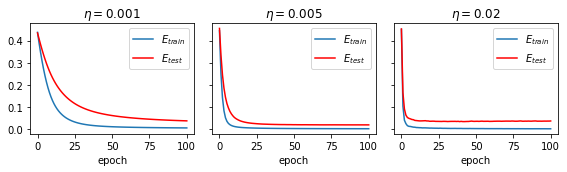

In [7]:
plt.close()
fig, plots = plt.subplots(1, len(errors), figsize=(8, 2.5), sharey=True)
for (train_error, test_error), plot, learning_rate in zip(errors, plots, learning_rate_range):
    x = np.arange(len(train_error))
    plot.plot(x, train_error, label="$E_{train}$")
    plot.plot(x, test_error, label="$E_{test}$", c="red")
    plot.set_title(f"$\\eta={learning_rate}$")
    plot.set_xlabel("epoch")
    plot.legend()
plt.tight_layout()
# plt.savefig('pictures/learning_rate_low.pgf')

In [8]:
b_range = [1.0, 4.0, 10.0]

errors = []
for b in b_range:
    print(f"{b = }")
    b_err = []
    for _ in range(20):
        # network = Network(N, learning_rate=lambda t: 3.0 / (t + 5.0))
        network = Network(N, learning_rate=lambda t: 1.0 / (b + t), lru="timestep")
        # network = Network(N, learning_rate=lambda t: 0.1 * np.exp(-0.1 * t), lru="epoch")

        train, test = Data.sample(X, Y)
        error = network.train(train, test, t_max=300)
        b_err.append(error)
    b_err = np.mean(b_err, axis=0)
    errors.append(b_err)

b = 1.0
b = 4.0
b = 10.0


301
301
301
301
301
301


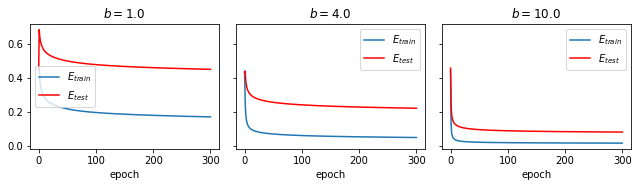

In [9]:
plt.close()
fig, plots = plt.subplots(1, len(errors), figsize=(9, 2.7), sharey=True)
for (train_error, test_error), plot, b in zip(errors, plots, b_range):
    x = np.arange(len(train_error))
    print(len(train_error))
    print(len(test_error))
    plot.plot(x, train_error, label="$E_{train}$")
    plot.plot(x, test_error, label="$E_{test}$", c="red")
    plot.set_title(f"$b={b}$")
    plot.set_xlabel("epoch")
    plot.legend()
plt.tight_layout()
# plt.savefig('pictures/learning_rate_t.pgf')